## 코로나데이터 분석 및 시각화

## 1.지역별 확진자 비율을 시각화, 감염경로확인
- kaggle의 case, 행정안전부의 population data 사용
- case data를 사용하여 지역별 누적확진자수를 구한다
- population data에서 지역별 총인구수 열을 case dataframe에 추가한다
- 행정구역별 확진자수 ÷ 지역별 총인구수 = 지역별 확진자 비율
- 지역별 확진자 비율을 그래프를 통하여 확인
- 확진자 비율이 높은 지역의 감염경로 확인

### 1-1) Data load

In [250]:
##라이브러리 불러오기
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inlineㅊ


import warnings
warnings.filterwarnings("ignore")

In [251]:
#한글폰트깔기
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

In [252]:
##코로나 data set 불러오기
case = pd.read_csv("coronavirusdataset_20200601/Case.csv", index_col=0)
patient = pd.read_csv("coronavirusdataset_20200601/PatientInfo.csv", index_col=0)
#patient_route = pd.read_csv("coronavirusdataset_20200601/PatientRoute.csv", index_col=0)
#Policy = pd.read_csv("coronavirusdataset_20200601/Policy.csv", index_col=0)
#region = pd.read_csv("coronavirusdataset_20200601/Region.csv", index_col=0)
#SearchTrend = pd.read_csv("coronavirusdataset_20200601/SearchTrend.csv", index_col=0)
#SeoulFloating = pd.read_csv("coronavirusdataset_20200601/SeoulFloating.csv", index_col=0)
#time_age= pd.read_csv("coronavirusdataset_20200601/TimeAge.csv", index_col=0)
time_gender = pd.read_csv("coronavirusdataset_20200601/TimeGender.csv", index_col=0)
#time_province = pd.read_csv("coronavirusdataset_20200601/TimeProvince.csv", index_col=0)
#time = pd.read_csv("coronavirusdataset_20200601/Time.csv", index_col=0)
#Weather = pd.read_csv("coronavirusdataset_20200601/Weather.csv", index_col=0)

In [253]:
##population는 3월에 집계한 대한민국의 행정기관별 인구수
population = pd.read_csv("coronavirusdataset_20200601/202003_202003_주민등록인구및세대현황_월간.csv", encoding='CP949')

### 1-2) Data 전처리

- population data 전처리
- case data 전처리
- population data의 'province_ko' 열과 case data의 'province_ko' 열을 기준으로 새로운 dataset 만들기 위함

In [254]:
#population data
population.head()

,행정구역,2020년03월_총인구수,2020년03월_세대수,2020년03월_세대당 인구,2020년03월_남자 인구수,2020년03월_여자 인구수,2020년03월_남여 비율
0,전국 (1000000000),"51,843,195","22,613,882",2.29,"25,858,743","25,984,452",1.00
1,서울특별시 (1100000000),"9,733,655","4,354,006",2.24,"4,742,217","4,991,438",0.95
2,부산광역시 (2600000000),"3,409,932","1,505,897",2.26,"1,672,252","1,737,680",0.96
3,대구광역시 (2700000000),"2,433,568","1,037,956",2.34,"1,202,273","1,231,295",0.98
4,인천광역시 (2800000000),"2,952,689","1,243,983",2.37,"1,479,839","1,472,850",1.00


In [255]:
#행정구역 data들을 지역이름만 나타내기 위해 province_ko라는 새로운 열을 추가
population['province_ko'] = population.행정구역.map(lambda x : x.split()[0])
population.head()

,행정구역,2020년03월_총인구수,2020년03월_세대수,2020년03월_세대당 인구,2020년03월_남자 인구수,2020년03월_여자 인구수,2020년03월_남여 비율,province_ko
0,전국 (1000000000),"51,843,195","22,613,882",2.29,"25,858,743","25,984,452",1.00,전국
1,서울특별시 (1100000000),"9,733,655","4,354,006",2.24,"4,742,217","4,991,438",0.95,서울특별시
2,부산광역시 (2600000000),"3,409,932","1,505,897",2.26,"1,672,252","1,737,680",0.96,부산광역시
3,대구광역시 (2700000000),"2,433,568","1,037,956",2.34,"1,202,273","1,231,295",0.98,대구광역시
4,인천광역시 (2800000000),"2,952,689","1,243,983",2.37,"1,479,839","1,472,850",1.00,인천광역시


In [256]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             18 non-null     object 
 1   2020년03월_총인구수    18 non-null     object 
 2   2020년03월_세대수     18 non-null     object 
 3   2020년03월_세대당 인구  18 non-null     float64
 4   2020년03월_남자 인구수  18 non-null     object 
 5   2020년03월_여자 인구수  18 non-null     object 
 6   2020년03월_남여 비율   18 non-null     float64
 7   province_ko      18 non-null     object 
dtypes: float64(2), object(6)
memory usage: 1.2+ KB


In [257]:
# 콤마(,) 표시를 없애야 문자열을 실수형으로 변환할 수 있기 때문에 콤마(,)를 없애주기
def str2int(x):
    num = ''
    for i in x.split(','):
        num+=i

    return float(num)

In [258]:
#문자열->실수형으로 type변환
population['2020년03월_총인구수'] = population['2020년03월_총인구수'].map(lambda x : str2int(x))
population['2020년03월_세대수'] = population['2020년03월_세대수'].map(lambda x : str2int(x))
population['2020년03월_남자 인구수'] = population['2020년03월_남자 인구수'].map(lambda x : str2int(x))
population['2020년03월_여자 인구수'] = population['2020년03월_여자 인구수'].map(lambda x : str2int(x))
population

,행정구역,2020년03월_총인구수,2020년03월_세대수,2020년03월_세대당 인구,2020년03월_남자 인구수,2020년03월_여자 인구수,2020년03월_남여 비율,province_ko
0,전국 (1000000000),51843195.0,22613882.0,2.29,25858743.0,25984452.0,1.00,전국
1,서울특별시 (1100000000),9733655.0,4354006.0,2.24,4742217.0,4991438.0,0.95,서울특별시
2,부산광역시 (2600000000),3409932.0,1505897.0,2.26,1672252.0,1737680.0,0.96,부산광역시
3,대구광역시 (2700000000),2433568.0,1037956.0,2.34,1202273.0,1231295.0,0.98,대구광역시
4,인천광역시 (2800000000),2952689.0,1243983.0,2.37,1479839.0,1472850.0,1.00,인천광역시
5,광주광역시 (2900000000),1455705.0,620050.0,2.35,720460.0,735245.0,0.98,광주광역시
6,대전광역시 (3000000000),1471858.0,638921.0,2.30,735179.0,736679.0,1.00,대전광역시
7,울산광역시 (3100000000),1144563.0,470294.0,2.43,588127.0,556436.0,1.06,울산광역시
8,세종특별자치시 (3600000000),344792.0,137208.0,2.51,171951.0,172841.0,0.99,세종특별자치시
9,경기도 (4100000000),13288975.0,5514938.0,2.41,6684759.0,6604216.0,1.01,경기도


province          0.0
city              0.0
group             0.0
infection_case    0.0
confirmed         2.3
latitude          0.0
longitude         0.0
dtype: float64

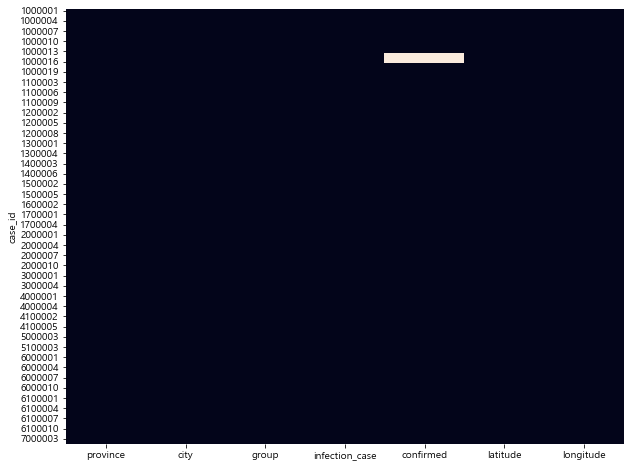

In [259]:
#case data
#살구색상이 결측치

"""
앞으로 사용할 데이터에 대해서 시각화를 통해 결측치가 얼마나 많은지 확인하고,
null 값이 존재하면 적절한 data로 변환하거나 행삭제
"""

display(round(case.isnull().sum()/case.shape[0] * 100,1))

plt.figure(figsize = (10,8))
sns.set_palette("bright") #색상
sns.heatmap(case.isnull(), cbar=False)
plt.show()

In [260]:
#case data 결측값 삭제
s = case.isnull().sum() #case dataset에서 결측값이 있는 data를 s로 저장
if s.sum() > 0:
    case.dropna(how='any', inplace=True) #결측값 삭제

province          0.0
city              0.0
group             0.0
infection_case    0.0
confirmed         0.0
latitude          0.0
longitude         0.0
dtype: float64

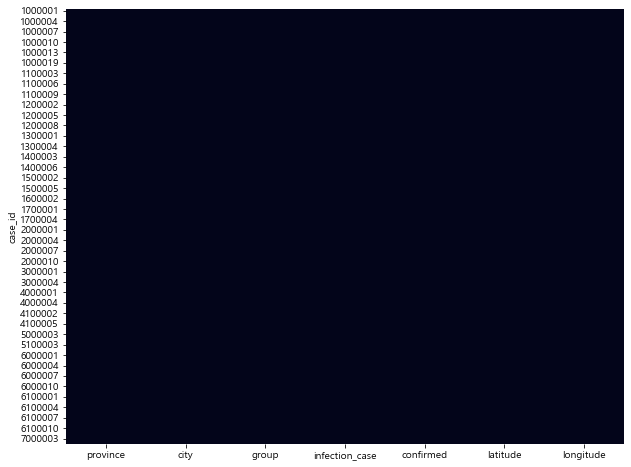

In [261]:
#결측값 삭제되었는지 시각화로 확인
display(round(case.isnull().sum()/case.shape[0] * 100,1))

plt.figure(figsize = (10,8))
sns.heatmap(case.isnull(), cbar=False)
plt.show()

In [262]:
case.head()

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165


In [263]:
#각 지역별로 그룹화
#그룹화한 지역의 이름은 population data의 province_ko 이름들과 같게 설정

grouped = case.groupby('province')

서울특별시 = grouped.get_group(name='Seoul')
부산광역시  = grouped.get_group(name='Busan')
대구광역시  = grouped.get_group(name='Daegu')
인천광역시  = grouped.get_group(name='Incheon')
광주광역시  = grouped.get_group(name='Gwangju')
대전광역시  = grouped.get_group(name='Daejeon')
울산광역시  = grouped.get_group(name='Ulsan')
세종특별자치시  = grouped.get_group(name='Sejong')
경기도  = grouped.get_group(name='Gyeonggi-do')
강원도  = grouped.get_group(name='Gangwon-do')
충청북도  = grouped.get_group(name='Chungcheongbuk-do')
충청남도  = grouped.get_group(name='Chungcheongnam-do')
전라북도  = grouped.get_group(name='Jeollabuk-do')
전라남도  = grouped.get_group(name='Jeollanam-do')
경상북도  = grouped.get_group(name='Gyeongsangbuk-do')
경상남도  = grouped.get_group(name='Gyeongsangnam-do')
제주특별자치도  = grouped.get_group(name='Jeju-do')

In [264]:
#각각 그룹화한 지역의 confirmed(확진자) 수를 알아보기 위함
#각 지역의 확진자 수를 더하여, 지역별 누적확진자 수 확인
#전국 누적 확진자 수도 알아보기

서울특별시 = 서울특별시['confirmed'].sum()
부산광역시  = 부산광역시['confirmed'].sum()
대구광역시  = 대구광역시['confirmed'].sum()
인천광역시  = 인천광역시['confirmed'].sum()
광주광역시  = 광주광역시['confirmed'].sum()
대전광역시  = 대전광역시['confirmed'].sum()
울산광역시  = 울산광역시['confirmed'].sum()
세종특별자치시  = 세종특별자치시['confirmed'].sum()
경기도  = 경기도['confirmed'].sum()
강원도  = 강원도['confirmed'].sum()
충청북도  = 충청북도['confirmed'].sum()
충청남도  =충청남도['confirmed'].sum()
전라북도  =전라북도['confirmed'].sum()
전라남도  = 전라남도['confirmed'].sum()
경상북도  = 경상북도['confirmed'].sum()
경상남도  = 경상남도['confirmed'].sum()
제주특별자치도 =제주특별자치도['confirmed'].sum()
전국 = (서울특별시+ 부산광역시+ 대구광역시+ 인천광역시+ 광주광역시+ 대전광역시+ 울산광역시+ 세종특별자치시+ 경기도+ 강원도+ \
        충청북도+ 충청남도+ 전라북도+ 전라남도+ 경상북도+ 경상남도+ 제주특별자치도)

In [265]:
#지역별 누적확진자 수를 알려주는 새로운 df1을 만듦
#열 이름을 population data에서와 동일하게 povince_ko로 설정, 이후에 province_ko를 기준으로 data를 합칠예정이기 때문

df1 = pd.DataFrame({'province_ko':['전국','서울특별시','부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',\
                                   '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
                    'confirmed':[전국, 서울특별시, 부산광역시, 대구광역시, 인천광역시, 광주광역시, 대전광역시, 울산광역시, 세종특별자치시, 경기도, 강원도,\
        충청북도, 충청남도, 전라북도, 전라남도, 경상북도, 경상남도, 제주특별자치도]})
df1

,province_ko,confirmed
0,전국,10364.0
1,서울특별시,781.0
2,부산광역시,149.0
3,대구광역시,6665.0
4,인천광역시,183.0
5,광주광역시,26.0
6,대전광역시,39.0
7,울산광역시,50.0
8,세종특별자치시,47.0
9,경기도,697.0


##### ------------두 개의 dataset 병합------------

In [266]:
### population dataset에 (case dataset에서 지역별 그룹화하여 확진자수를 더한) 열을 새롭게 추가
population=pd.merge(population, df1, on='province_ko')
population

,행정구역,2020년03월_총인구수,2020년03월_세대수,2020년03월_세대당 인구,2020년03월_남자 인구수,2020년03월_여자 인구수,2020년03월_남여 비율,province_ko,confirmed
0,전국 (1000000000),51843195.0,22613882.0,2.29,25858743.0,25984452.0,1.00,전국,10364.0
1,서울특별시 (1100000000),9733655.0,4354006.0,2.24,4742217.0,4991438.0,0.95,서울특별시,781.0
2,부산광역시 (2600000000),3409932.0,1505897.0,2.26,1672252.0,1737680.0,0.96,부산광역시,149.0
3,대구광역시 (2700000000),2433568.0,1037956.0,2.34,1202273.0,1231295.0,0.98,대구광역시,6665.0
4,인천광역시 (2800000000),2952689.0,1243983.0,2.37,1479839.0,1472850.0,1.00,인천광역시,183.0
5,광주광역시 (2900000000),1455705.0,620050.0,2.35,720460.0,735245.0,0.98,광주광역시,26.0
6,대전광역시 (3000000000),1471858.0,638921.0,2.30,735179.0,736679.0,1.00,대전광역시,39.0
7,울산광역시 (3100000000),1144563.0,470294.0,2.43,588127.0,556436.0,1.06,울산광역시,50.0
8,세종특별자치시 (3600000000),344792.0,137208.0,2.51,171951.0,172841.0,0.99,세종특별자치시,47.0
9,경기도 (4100000000),13288975.0,5514938.0,2.41,6684759.0,6604216.0,1.01,경기도,697.0


### 1-3) Data 분석
- 지역별 확진자 비율 = 지역별 확진자수 ÷ 지역별 총 인구수

In [267]:
#각 지역별 인구수에 비례한 확진자 비율 확인

pro_dict = {}

for i, p in enumerate(population.province_ko):
    confirmed_ratio = round((population['confirmed'][i]/population['2020년03월_총인구수'][i])*100,4)
    pro_dict[p] = confirmed_ratio
    
    print('{} 인구수 중 확진자 비율: {}%'.format(p, confirmed_ratio))

전국 인구수 중 확진자 비율: 0.02%
서울특별시 인구수 중 확진자 비율: 0.008%
부산광역시 인구수 중 확진자 비율: 0.0044%
대구광역시 인구수 중 확진자 비율: 0.2739%
인천광역시 인구수 중 확진자 비율: 0.0062%
광주광역시 인구수 중 확진자 비율: 0.0018%
대전광역시 인구수 중 확진자 비율: 0.0026%
울산광역시 인구수 중 확진자 비율: 0.0044%
세종특별자치시 인구수 중 확진자 비율: 0.0136%
경기도 인구수 중 확진자 비율: 0.0052%
강원도 인구수 중 확진자 비율: 0.0034%
충청북도 인구수 중 확진자 비율: 0.0028%
충청남도 인구수 중 확진자 비율: 0.0065%
전라북도 인구수 중 확진자 비율: 0.0009%
전라남도 인구수 중 확진자 비율: 0.0011%
경상북도 인구수 중 확진자 비율: 0.0499%
경상남도 인구수 중 확진자 비율: 0.0035%
제주특별자치도 인구수 중 확진자 비율: 0.0022%


In [268]:
#앞서 구한 지역별 확진자 비율을 새로운 열으로 추가
#추가한 '지역별 확진자 비율' 열을 시각화하여 살펴보기 위함

pro_df = pd.DataFrame({'province_ko' : list(pro_dict.keys()),
                       '지역별 확진자 비율' : list(pro_dict.values())}).sort_values('지역별 확진자 비율', ascending=False)

names = pro_df.columns[0] 
cols = pro_df.columns[1]


population=pd.merge(population, pro_df, on='province_ko')
population

,행정구역,2020년03월_총인구수,2020년03월_세대수,2020년03월_세대당 인구,2020년03월_남자 인구수,2020년03월_여자 인구수,2020년03월_남여 비율,province_ko,confirmed,지역별 확진자 비율
0,전국 (1000000000),51843195.0,22613882.0,2.29,25858743.0,25984452.0,1.00,전국,10364.0,0.0200
1,서울특별시 (1100000000),9733655.0,4354006.0,2.24,4742217.0,4991438.0,0.95,서울특별시,781.0,0.0080
2,부산광역시 (2600000000),3409932.0,1505897.0,2.26,1672252.0,1737680.0,0.96,부산광역시,149.0,0.0044
3,대구광역시 (2700000000),2433568.0,1037956.0,2.34,1202273.0,1231295.0,0.98,대구광역시,6665.0,0.2739
4,인천광역시 (2800000000),2952689.0,1243983.0,2.37,1479839.0,1472850.0,1.00,인천광역시,183.0,0.0062
5,광주광역시 (2900000000),1455705.0,620050.0,2.35,720460.0,735245.0,0.98,광주광역시,26.0,0.0018
6,대전광역시 (3000000000),1471858.0,638921.0,2.30,735179.0,736679.0,1.00,대전광역시,39.0,0.0026
7,울산광역시 (3100000000),1144563.0,470294.0,2.43,588127.0,556436.0,1.06,울산광역시,50.0,0.0044
8,세종특별자치시 (3600000000),344792.0,137208.0,2.51,171951.0,172841.0,0.99,세종특별자치시,47.0,0.0136
9,경기도 (4100000000),13288975.0,5514938.0,2.41,6684759.0,6604216.0,1.01,경기도,697.0,0.0052


### 1-4) Data 시각화1

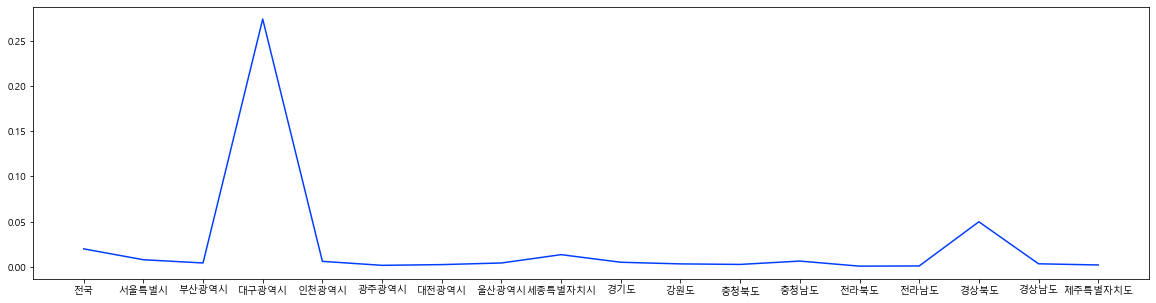

In [271]:
#시각화
x = population['province_ko']
y =population['지역별 확진자 비율']
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.show()

#### 시각화 결과

- 각지역의 인구수에 비례하였을때, 대구와 경상북도에서 많은 확진자가 발생한 것을 확인할 수 있다.
- 또한 그래프 내에서 기울기가 반대가 되는 부분이 세종특별자치시와 충정남도임을 미세하지만 확인할 수 있다.

- 대구에서 발생한 대규모 지역전염이 주변지역인 경상북도까지 영향을 미쳤음을 예상할 수 있다. 
- 이외에 많은 인원이 밀집하여 있는 서울, 세종특별자치시, 충청남도에서 비교적 많은 환자가 발생한 것을 알 수 있다.

#### 시각화 해석
- 지역별 확진자 비율이 가장 높은 대구는 0.27%의 인구가 감염되었으며, 대한민국 전체적인 감염 비율은 0.0182%이다.
- 이는 대한민국 1000명 중 1.82명, 대구는 1000명 중 27.0명이 감염된 수치이다.
- 대한민국 인구수에 따른 감염자 비율은 낮아보일 수 있지만, 인구수를 생각해보았을때 0.0182%가 굉장히 높은 수치임을 알 수 있다.
- 한달 내에 대한민국 인구수의 0.0182%가 감염되었다는 것은, 사람들이 전염병을 두려워할만한 수치라고 할 수 있다.

#### 시각화를 바탕으로
- 감염확산을 막기 위해서는 어디서 감염이 시작되었는지 원인을 찾는 것이 중요하다.
- 따라서 다른 지역에 비해 높은 확진자 비율을 가지고 있는 대구광역시와 경상북도 지역의 집단감염지를 확인해보고자 한다.
- 다른 지역에 비해 높은 확진자 비율을 가지고 있는 대구광역시와 경상북도 지역의 집단감염지를 확인해보도록 하려고 한다.

### 1-5) 데이터 시각화2
> 감염이 어디서 시작되었는지 알아보기 적합한 dataset을 만들기 위한 전처리, 분석, 시각화 과정
- 전처리
- 분석
- 시각화

In [273]:
#전처리
#case data를 이용하여 대구광역시, 경상북도 지역의 집단감염지 확인하기
case.head()

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165


In [274]:
#확진자가 많이 나왔던 대구광역시와 경상북도 지역을 그룹화
grouped2 = case.groupby('province')

대구광역시 = grouped2.get_group(name='Daegu')
경상북도  = grouped2.get_group(name='Gyeongsangbuk-do')

In [275]:
#확진자수(confirmed)를 내림차순하여 어느 감염지(infection_case)에서 감염이 많이 됐는지 확인
#대구
대구광역시.sort_values(by=['confirmed'],ascending=False).head() #내림차순

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1200001,Daegu,Nam-gu,True,Shincheonji Church,4510.0,35.84008,128.5667
1200009,Daegu,-,False,contact with patient,920.0,-,-
1200010,Daegu,-,False,etc,737.0,-,-
1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196.0,35.857375,128.466651
1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,128.0,35.885592,128.556649


In [276]:
#확진자수(confirmed)를 내림차순하여 어느 감염지(infection_case)에서 감염이 많이 됐는지 확인
#경상북도
경상북도.sort_values(by=['confirmed'],ascending=False).head() #내림차순

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566.0,-,-
6000011,Gyeongsangbuk-do,-,False,contact with patient,190.0,-,-
6000012,Gyeongsangbuk-do,-,False,etc,132.0,-,-
6000002,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,120.0,35.64887,128.7368
6000003,Gyeongsangbuk-do,Bonghwa-gun,True,Bonghwa Pureun Nursing Home,68.0,36.92757,128.9099


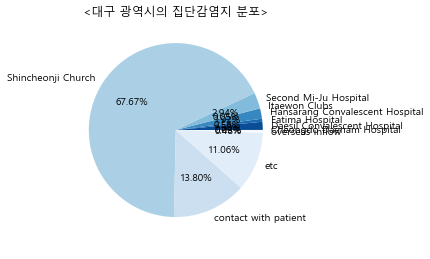

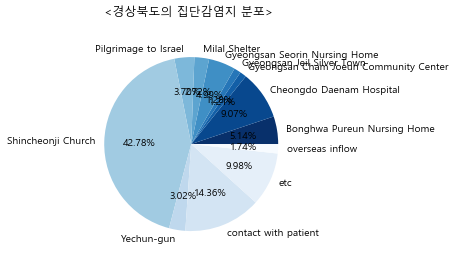

In [280]:
#infection_case를 기준으로 그룹화를 진행하고 감염지의 누적확진자수를 바탕으로 시각화

대구광역시.groupby('infection_case')['confirmed'].sum().plot(kind='pie', autopct = '%.2f%%', colormap='Blues_r')
plt.title("<대구 광역시의 집단감염지 분포>")
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()
경상북도.groupby('infection_case')['confirmed'].sum().plot(kind='pie', autopct = '%.2f%%', colormap='Blues_r')
plt.title("<경상북도의 집단감염지 분포> \n")
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

#### 시각화 결과

- 감염지 1등: 대구광역시에서는 50%이상 , 경상북도에서는 40% 이상의 사람들이 종교집단에 의해 감염된 것을 확인할 수 있다.
- 감염지 2등: 대구광역시에서는 13.80%, 경상북도에서는 14.36%의 사람들이 요양병원에서 감염된 것을 확인할 수 있다.
- 감염지 3등: 대구광역시에서는 11.06%, 경상북도에서는 9.98%의 사람들이 이외의 곳에서 감염되었다.

#### 시각화 해석
- 대구광역시와 경상북도 모두 세번째 집단감염지는 ect 이므로, 종교집단과 요양병원에서 가장 많은 사람들이 감염된 것을 알 수 있다.

### patient dataset

global_num            29.9
sex                    8.2
birth_year            18.4
age                   12.0
country                0.0
province               0.0
city                   1.9
disease               99.6
infection_case        19.8
infection_order       99.2
infected_by           77.5
contact_number        83.0
symptom_onset_date    86.6
confirmed_date         0.1
released_date         62.3
deceased_date         98.4
state                  0.0
dtype: float64

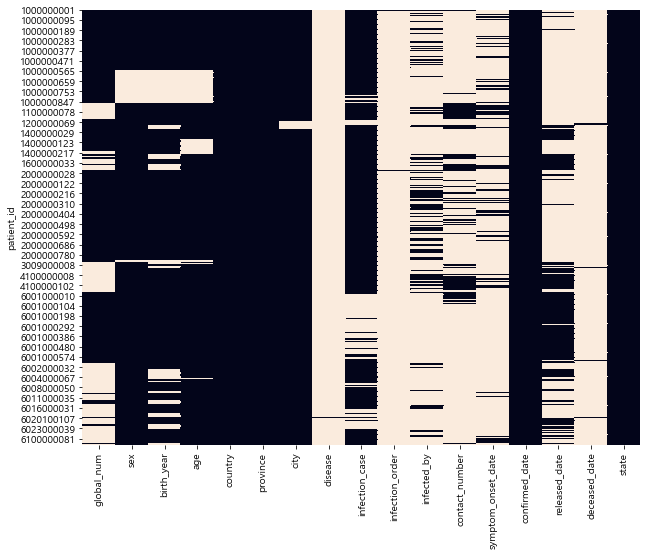

In [154]:
"""
앞으로 사용할 데이터에 대해서 시각화를 통해 결측치가 얼마나 많은지 확인하고,
null 값이 존재하면 적절한 data로 변환하거나 행삭제
"""

display(round(patient.isnull().sum()/patient.shape[0] * 100,1))

plt.figure(figsize = (10,8))
sns.set_palette("bright") #색상
sns.heatmap(patient.isnull(), cbar=False)
plt.show()

In [155]:
"""contact_number에서의 결측치는 접촉자가 없는 것이므로, NaN값들을 0으로 채운다"""
patient['contact_number'] = patient['contact_number'].fillna(0)

In [156]:
"""
patient dataframe은 거의 값이 없는 열(attribute)가 많은 것을 확인할 수 있음.
분석에tj 사용하지 않는 열은 삭제
"""
patient = patient.drop(['disease','infection_order','infected_by', \
                        'symptom_onset_date','released_date','deceased_date'], axis=1)


In [157]:
"""
birth_year를 계산하여 age를 재구성하려고한다.
이때 birth_year을 통해 age를 계산할 수 있도록 결측치가 있는 행은 삭제한 다음,
birth_year의 type을 문자열에서 실수형으로 바꾼다.
"""

b_isnull = patient['birth_year'].isnull().sum()
if b_isnull > 0 :
    patient.dropna(how='any', inplace=True) 
    
patient['birth_year'] = patient['birth_year'].astype("float")
print(patient.dtypes)


"""birth_year를 이용하여 age를 재구성"""
patient.loc[((patient['birth_year']>1921)&(patient['birth_year']<1931)),'age']='90s'
patient.loc[((patient['birth_year']>1931)&(patient['birth_year']<1941)),'age']='80s'
patient.loc[((patient['birth_year']>1941)&(patient['birth_year']<1951)),'age']='70s'
patient.loc[((patient['birth_year']>1951)&(patient['birth_year']<1961)),'age']='60s'
patient.loc[((patient['birth_year']>1961)&(patient['birth_year']<1971)),'age']='50s'
patient.loc[((patient['birth_year']>1971)&(patient['birth_year']<1981)),'age']='40s'
patient.loc[((patient['birth_year']>1981)&(patient['birth_year']<1991)),'age']='30s'
patient.loc[((patient['birth_year']>1991)&(patient['birth_year']<2001)),'age']='20s'
patient.loc[((patient['birth_year']>2001)&(patient['birth_year']<2011)),'age']='10s'
patient.loc[((patient['birth_year']>2011)&(patient['birth_year']<2021)),'age']='0s'

global_num        float64
sex                object
birth_year        float64
age                object
country            object
province           object
city               object
infection_case     object
contact_number     object
confirmed_date     object
state              object
dtype: object


In [158]:
patient.head()

,global_num,sex,birth_year,age,country,province,city,infection_case,contact_number,confirmed_date,state
patient_id,,,,,,,,,,,
1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-01-23,released
1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-01-30,released
1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-01-30,released
1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-01-30,released
1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-01-31,released


In [159]:
patient_day = patient[['age', 'confirmed_date', 'contact_number', 'sex']].sort_values(by = 'confirmed_date').dropna(subset=['confirmed_date']).reset_index(drop=True)

In [160]:
#b.set_index('confirmed_date')
patient_day

,age,confirmed_date,contact_number,sex
0,30s,2020-01-20,0,female
1,50s,2020-01-23,75,male
2,50s,2020-01-26,16,male
3,50s,2020-01-27,95,male
4,50s,2020-01-30,17,male
...,...,...,...,...
1633,80s,2020-05-29,0,female
1634,60s,2020-05-29,0,female
1635,60s,2020-05-29,0,female
1636,90s,2020-05-29,0,male


In [161]:
#co = patient_day.sex.astype('category')
#co = co.cat.codes

In [162]:
print(patient_day.dtypes)

age               object
confirmed_date    object
contact_number    object
sex               object
dtype: object


In [163]:
patient_day['number']=range(1,1639)
patient_day['0s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['0s'] if '0s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['10s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['10s'] if '10s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['20s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['20s'] if '20s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['30s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['30s'] if '30s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['40s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['40s'] if '40s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['50s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['50s'] if '50s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['60s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['60s'] if '60s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['70s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['70s'] if '70s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['80s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['80s'] if '80s' in patient_day.age.iloc[: x].value_counts() else 0)
patient_day['90s'] = patient_day['number'].apply(lambda x : patient_day.age.iloc[: x].value_counts()['90s'] if '90s' in patient_day.age.iloc[: x].value_counts() else 0)

In [164]:
patient_day

,age,confirmed_date,contact_number,sex,number,0s,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,30s,2020-01-20,0,female,1,0,0,0,1,0,0,0,0,0,0
1,50s,2020-01-23,75,male,2,0,0,0,1,0,1,0,0,0,0
2,50s,2020-01-26,16,male,3,0,0,0,1,0,2,0,0,0,0
3,50s,2020-01-27,95,male,4,0,0,0,1,0,3,0,0,0,0
4,50s,2020-01-30,17,male,5,0,0,0,1,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,80s,2020-05-29,0,female,1634,27,54,388,280,220,296,177,97,73,20
1634,60s,2020-05-29,0,female,1635,27,54,388,280,220,296,178,97,73,20
1635,60s,2020-05-29,0,female,1636,27,54,388,280,220,296,179,97,73,20
1636,90s,2020-05-29,0,male,1637,27,54,388,280,220,296,179,97,73,21


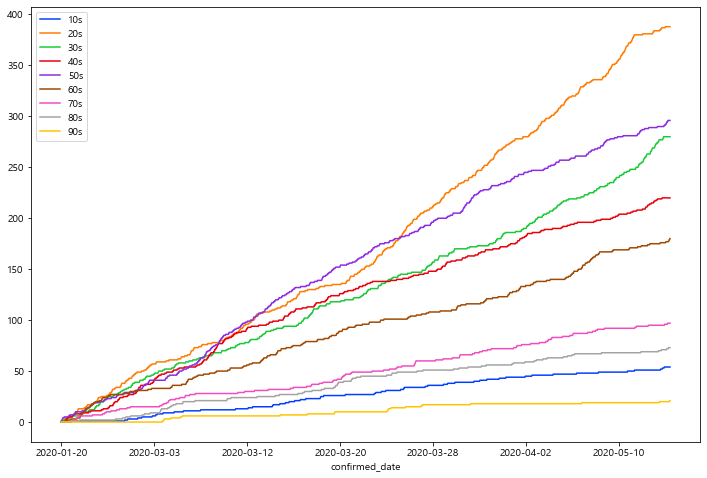

In [165]:
patient_day.plot(kind='line', x='confirmed_date', y=['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s','90s'], figsize = (12,8))
plt.show()

### time_gender dataset

In [166]:
time_gender

,time,sex,confirmed,deceased
date,,,,
2020-03-02,0,male,1591,13
2020-03-02,0,female,2621,9
2020-03-03,0,male,1810,16
2020-03-03,0,female,3002,12
2020-03-04,0,male,1996,20
...,...,...,...,...
2020-05-29,0,female,6643,127
2020-05-30,0,male,4780,142
2020-05-30,0,female,6661,127


In [167]:
gender_confirmed = time_gender[['sex', 'confirmed']].iloc[-2:]
gender_confirmed = gender_confirmed.set_index('sex')
gender_confirmed

,confirmed
sex,
male,4795
female,6673


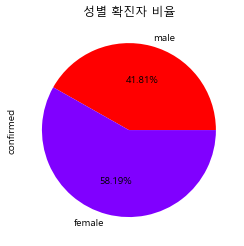

In [168]:
#확진자 비율 파이그래프
gender_confirmed['confirmed'].plot.pie(title="성별 확진자 비율", autopct = '%.2f%%',  colormap='rainbow_r')
plt.show()

In [169]:
die_gender = time_gender.iloc[-2:]
die_gender

,time,sex,confirmed,deceased
date,,,,
2020-05-31,0,male,4795,143
2020-05-31,0,female,6673,127


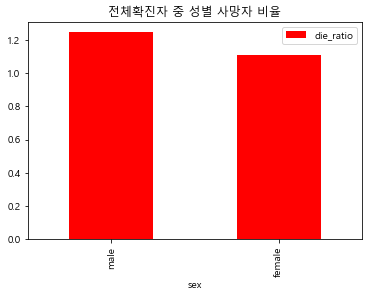

,time,sex,confirmed,deceased,die_ratio
date,,,,,
2020-05-31,0,male,4795,143,1.2469
2020-05-31,0,female,6673,127,1.1074


In [170]:
die_gender = time_gender.iloc[-2:]

confirmed_sum = die_gender['confirmed'].sum()
die_gender['die_ratio'] = round(die_gender.deceased/confirmed_sum*100, 4)
die_ratio_df = die_gender[['sex', 'die_ratio']]
die_ratio_df = die_ratio_df.set_index('sex')

die_ratio_df.plot.bar(title="전체확진자 중 성별 사망자 비율",colormap='rainbow_r')
plt.show()
die_gender

전체 확진자 중 사망한 사람들의 성별의 비율을 확인해본 결과 남자는 1.2469%, 여자는 1.1074%로 큰 차이는 나지 않는다.
전체확진자 중 약 1% 이상씩 사망한 것으로 나타났다.

하지만, 전체확진자중 남자와 여자비율이 다르므로 세부적으로 성별별 확진자비율을 확인해보려고한다.

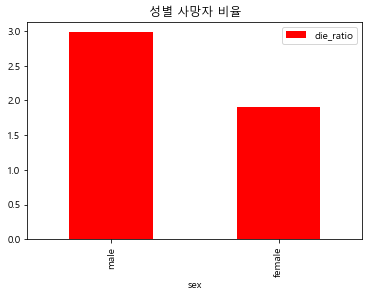

,die_ratio
sex,
male,2.9823
female,1.9032


In [171]:
time_gender['die_ratio'] = round(time_gender.deceased/time_gender.confirmed*100,4)
die_ratio_df = time_gender[['sex', 'die_ratio']].iloc[-2:]
die_ratio_df = die_ratio_df.set_index('sex')

die_ratio_df.plot.bar(title="성별 사망자 비율",colormap='rainbow_r')
plt.show()
die_ratio_df

성별 확진자 비율에 따라 사망한 사람들의 성별 비율을 확인해보았다.

남자는 2.9823%, 여자는 1.9032%로 남자가 1.5배 정도 사망확률이 높다는 것을 확인할 수 있다.